In [1]:
#importing the necessary libraries
import time
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager
import os

In [2]:
# starting in maximized window for the web driver
options = Options()
options.add_argument("start-maximized")
options.add_argument("--disable-default-apps")

In [3]:
# Chrome Driver installation
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)

[WDM] - Downloading: 100%|█████████████████████████████████████████████████████████| 6.79M/6.79M [00:10<00:00, 708kB/s]


In [4]:
# go to the website
link = "https://www.linkedin.com/uas/login?session_redirect=https%3A%2F%2Fwww%2Elinkedin%2Ecom%2Ffeed%2F&fromSignIn=true&trk=cold_join_sign_in"
driver.get(link)
# wait for the driver to load
time.sleep(1) 

In [5]:
# Defining the login variables
email=os.environ.get("ln_email")
password=os.environ.get("ln_ps")

In [6]:
# Logging into my account
username=driver.find_element(By.ID,"username")
username.send_keys(email)
pas=driver.find_element(By.ID,"password")
pas.send_keys(password)
bot=driver.find_element(By.XPATH,"//button[contains(text(),'Sign in')]")
bot.click()

In [18]:
# Going to the INPT linkedin page
link = "https://www.linkedin.com/school/institut-national-des-postes-et-telecommunications/people/?educationEndYear=2019&educationStartYear=2000"
driver.get(link)
# wait for the driver to load
time.sleep(1)

In [19]:
# Scrolling down to collect data
for _ in range(8):
    driver.execute_script("window.scrollTo(0,document.body.scrollHeight)")
    time.sleep(2)

In [25]:
# Collecting the alumni profil urls
alumni=driver.find_elements(By.XPATH,"/html/body/div[5]/div[3]/div/div[2]/div/div[2]/main/div[2]/div/div[2]/div/div[1]/ul/li/div/section/div/div/div[1]/a")
alumniref=[item.get_attribute("href") for item in alumni]

In [194]:
len(alumniref)

108

In [27]:
# Collecting alumni names
names=[]
for i in alumniref:
    driver.get(i)
    # wait for the driver to load
    time.sleep(1)
    names+=[driver.find_element(By.TAG_NAME,"h1").text]

In [214]:
print(len(names))
names

108


['Fatine CHAIB',
 'Salim Remman',
 'Mahmoud Chandid',
 'Mohamed Fahmy',
 'sara mejdal',
 'Oussama Garaaoui',
 'Yassine Laghmam',
 'Doha Cherkaoui',
 'Omar A.',
 'Nouhaila El Khaoudi',
 'Mohammed Berouissat',
 'Zakaria BOUDLAL',
 'Khalid El Gourte',
 'Mounia EL QADIRY',
 'Omar Essalek',
 'Othmane HARI',
 'Hajar Bendaoud',
 'Mouad CHERKAOUI SEMMOUNI',
 'Abderrazzak Sabri',
 'Mohamed B.',
 'Zakaria Bouaiba',
 'Abdellah ASBIK',
 'Oumaima Outamldou',
 'Oumaima Ghailan',
 'Mohamed Amine BOUGHDAD',
 'Salma Tamdi',
 'Omar Bennis',
 'Rachid EL MANSOUR',
 "Choubou M'hand",
 'Hamza El Bairouni',
 'Mehdi Slaoui',
 'CHAIMA AIT BOUAZIZ',
 'Omar DAFIRI',
 'Noura EL OMARI',
 'El Mehdi Echchad',
 'Iliass Belqadi',
 'Fatima FOUAD',
 'Mimoune Z.',
 'Boutaina JNIYAH',
 'Adil Radja',
 'Nouhaila Benfars',
 'Yassine ECHCHETOUKY',
 'Nasiha SEBTI',
 'Safae KEHAIL',
 'El Mehdi Alaoui-Kadiri',
 'Soukaina Cherrabi',
 'Youssef EL Yamani',
 'Mohammed BARBOUCHI',
 'Dr. khaoula belhaj soulami',
 'SARA MESRAR',
 'Abde

In [36]:
# Collecting alumni jobs
job=[]
for i in alumniref:
    driver.get(i)
    # wait for the driver to load
    time.sleep(1.5)
    sec=driver.find_elements(By.CSS_SELECTOR,'section[id^="ember"]')
    try:
        job+=[sec[0].find_element(By.CSS_SELECTOR,'div[class="text-body-medium break-words"]').text]
    except:
        job+=[None]

In [213]:
print(len(job))
job

108


['Data Analyste',
 'Ingénieur Télécom | Expert Transmission FH',
 'Ingénieur de projets',
 'Software Engineer at BCG',
 'Ingénieur Développement python',
 'Chef de projet IT',
 'Data Consultant',
 'Ingénieur Radio chez Intelcia IT solutions',
 '',
 'Solution Consultant at Salesforce |☁️ X4 Salesforce Certified',
 'Cybersecurity engineer | Azure AZ-500 Certified | Ingénieur cybersécurité et confiance numérique',
 'Architecte systèmes et base de données',
 'Cybersecurity Engineer | F5 Certified Administrator | 2xOracle Cloud Infrastructure Security | AZ-900 Certified',
 "Ingénieure d'état en Cybersécurité et confiance numérique",
 'Chef de projet / Data protection chez Attijariwafa bank',
 'EDI Consultant',
 'Cyber Security Consultant',
 'Cybersecurity Consultant at Thales',
 'Machine Learning Engineer, PhD student',
 '-',
 'Infrastructure Engineer | Certified Kubernetes ☸ | Certified Gitlab',
 'Recent graduate in Data Engineering',
 'Consultante de sécurité SI',
 'Ingénieur études et dé

In [70]:
# Collecting alumni location
location=[]
for i in alumniref:
    driver.get(i)
    # wait for the driver to load
    time.sleep(2)
    sec=driver.find_elements(By.CSS_SELECTOR,'section[id^="ember"]')
    try:
        location+=[sec[0].find_element(By.CSS_SELECTOR,'span[class="text-body-small inline t-black--light break-words"]').text.replace(",","")]
    except:
        location+=[None]
    time.sleep(2)

In [212]:
print(len(location))
location

108


['Casablanca Casablanca-Settat Morocco',
 'Prefecture of Mohammédia Casablanca-Settat Morocco',
 'Prefecture of Mohammédia Casablanca-Settat Morocco',
 'Rabat Rabat-Salé-Kenitra Morocco',
 'Casablanca-Settat Morocco',
 'Rabat Rabat-Salé-Kenitra Morocco',
 'Morocco',
 'Morocco',
 'Beni Mellal Béni Mellal-Khénifra Morocco',
 'Morocco',
 'Rabat Rabat-Salé-Kenitra Morocco',
 'Casablanca-Settat Morocco',
 'Casablanca Metropolitan Area',
 'Rabat Rabat-Salé-Kenitra Morocco',
 'France',
 'Prefecture of Casablanca Casablanca-Settat Morocco',
 'Casablanca Casablanca-Settat Morocco',
 'Rabat Rabat-Salé-Kenitra Morocco',
 'Rabat Rabat-Salé-Kenitra Morocco',
 'Taza Fès-Meknès Morocco',
 'Rabat Rabat-Salé-Kenitra Morocco',
 'Rabat-Salé-Kenitra Morocco',
 'Morocco',
 'Casablanca-Settat Morocco',
 'Casablanca-Settat Morocco',
 'Casablanca-Settat Morocco',
 'Prefecture of Casablanca Casablanca-Settat Morocco',
 'Bouskoura Casablanca-Settat Morocco',
 'Rabat Rabat-Salé-Kenitra Morocco',
 'Casablanca Met

In [208]:
# Collecting Alumni company of work
section="Experience"
company=[]
p=0
for j in alumniref:
    driver.get(j)
    # wait for the driver to load
    time.sleep(1.5)
    try:
        company+=[(driver.find_element(By.CSS_SELECTOR,'button[aria-label^="Current company:"]').find_element(By.TAG_NAME,'div')).text]
        p+=1
        print(p)
    except:
        driver.execute_script("window.scrollTo(0,document.body.scrollHeight)")
        time.sleep(1.5)
        sec=driver.find_element(By.CSS_SELECTOR,'main[id="main"]').find_elements(By.TAG_NAME,'section')
        for i in range(1,len(sec)):
            try:
                if sec[i].find_element(By.TAG_NAME,'h2').find_element(By.TAG_NAME,'span').text==section:
                    c=sec[i].find_element(By.TAG_NAME,'ul').find_element(By.TAG_NAME,'li').find_element(By.CSS_SELECTOR,'span[class="t-14 t-normal"]').find_element(By.TAG_NAME,'span').text
                    if 'mos' in c.split() or 'yrs' in c.split() or 'yr' in c.split():
                        company+=[sec[i].find_element(By.TAG_NAME,'ul').find_element(By.TAG_NAME,'li').find_element(By.TAG_NAME,'span').find_element(By.TAG_NAME,'span').text]
                        p+=1
                        print(p)
                    else:
                        try:
                            company+=[c.split(' ·')[0]]
                            p+=1
                            print(p)
                        except:
                            company+=[c]
                            p+=1
                            print(p)
            except:
                company+=[None]
                p+=1
                print(p)
                

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59


NoSuchElementException: Message: no such element: Unable to locate element: {"method":"css selector","selector":"main[id="main"]"}
  (Session info: chrome=111.0.5563.65)
Stacktrace:
Backtrace:
	(No symbol) [0x00A6DCE3]
	(No symbol) [0x00A039D1]
	(No symbol) [0x00914DA8]
	(No symbol) [0x0094019F]
	(No symbol) [0x009403AB]
	(No symbol) [0x0096EE62]
	(No symbol) [0x0095AF14]
	(No symbol) [0x0096D57C]
	(No symbol) [0x0095ACC6]
	(No symbol) [0x00936F68]
	(No symbol) [0x009380CD]
	GetHandleVerifier [0x00CE3832+2506274]
	GetHandleVerifier [0x00D19794+2727300]
	GetHandleVerifier [0x00D1E36C+2746716]
	GetHandleVerifier [0x00B16690+617600]
	(No symbol) [0x00A0C712]
	(No symbol) [0x00A11FF8]
	(No symbol) [0x00A120DB]
	(No symbol) [0x00A1C63B]
	BaseThreadInitThunk [0x77247D69+25]
	RtlInitializeExceptionChain [0x77ABB74B+107]
	RtlClearBits [0x77ABB6CF+191]


In [199]:
s=0
for i in company:
    if i==None:
        s+=1
s

4

In [200]:
company_reserve=company[:]

In [207]:
company_reserve

['CONFIDENTIEL',
 'AFD Tech',
 'Attijari Payment Processing',
 'Boston Consulting Group (BCG)',
 None,
 'Parrot',
 'Maroc Telecom',
 'DataValue Consulting',
 'Intelcia IT Solutions',
 'Intellisec Solutions',
 'Salesforce',
 'Webhelp',
 'Poste Maroc (Barid Al-Maghrib)',
 'NG DATA',
 'SAFEDEMAT',
 'Attijariwafa bank',
 'EDICOM',
 'Deloitte',
 'Thales',
 'Laboratoire de recherche STRS (INPT)',
 '3N Systèmes',
 'Capgemini',
 'CEGEDIM SRH',
 'PwC',
 'Institut National des Postes et Télécommunications (INPT)',
 'EXteam',
 'Orange Maroc',
 'MEGA International',
 'Renault Group',
 'HPS',
 'Deloitte',
 'Société Générale - Africa Technologies & Services',
 'NEOXIA',
 'Munisys',
 'Sofrecom',
 'Deloitte',
 'The Good Data Factory',
 'Intelcia IT Solutions',
 'Self Employed',
 'Deloitte',
 'Orange Maroc',
 'AFD Technologies',
 'MyTower',
 'Société Générale African Business Services',
 'HPS',
 'Deloitte',
 'Boston Consulting Group (BCG)',
 'Leyton',
 'Confidential',
 'Boston Consulting Group (BCG)',


In [210]:
len(names),len(job),len(location),len(company_reserve)

(108, 108, 108, 110)

In [219]:
info=list(zip(names,job,location,company_reserve))
info[55:57]

[('Hamza A.',
  'Data Scientist',
  'Casablanca Metropolitan Area',
  'Attijariwafa bank'),
 ('Omar EL-KHAMSSA',
  'Ingénieur télécoms et ICT | INPT | Chef de projet chez Vinci Energies',
  'Prefecture of Casablanca Casablanca-Settat Morocco',
  'VINCI Energies')]

In [221]:
# Saving Data into a CSV file
info=list(zip(names,job,location,company_reserve))
with open('linkedindata.csv','w') as f:
    f.write("name"+str(",")+"job"+str(",")+"location"+str(",")+"company"+"\n")
    for i in info:
        f.write(str(i[0])+','+str(i[1])+','+str(i[2])+','+str(i[3])+"\n")

UnicodeEncodeError: 'charmap' codec can't encode characters in position 55-56: character maps to <undefined>

In [222]:
# Solving the encoding problem
with open('linkedindata.csv','w',encoding='utf-8') as f:
    f.write("name"+str(",")+"job"+str(",")+"location"+str(",")+"company"+"\n")
    for i in info:
        f.write(str(i[0])+','+str(i[1])+','+str(i[2])+','+str(i[3])+"\n")

In [234]:
# Converting DATA into a DATAFRAME
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('linkedindata.csv')

# Print the first few rows of the DataFrame
print(df.head())


              name                                         job  \
0     Fatine CHAIB                               Data Analyste   
1     Salim Remman  Ingénieur Télécom | Expert Transmission FH   
2  Mahmoud Chandid                        Ingénieur de projets   
3    Mohamed Fahmy                    Software Engineer at BCG   
4      sara mejdal              Ingénieur Développement python   

                                            location  \
0               Casablanca Casablanca-Settat Morocco   
1  Prefecture of Mohammédia Casablanca-Settat Mor...   
2  Prefecture of Mohammédia Casablanca-Settat Mor...   
3                   Rabat Rabat-Salé-Kenitra Morocco   
4                          Casablanca-Settat Morocco   

                         company  
0                   CONFIDENTIEL  
1                       AFD Tech  
2    Attijari Payment Processing  
3  Boston Consulting Group (BCG)  
4                           None  


In [258]:
# from EXCEL file to DATAFRAME
df=pd.read_excel('linkedindata2.xlsx')
df.head()

,name,job,location,company
0,Fatine CHAIB,Data Analyste,Casablanca Casablanca-Settat Morocco,CONFIDENTIEL
1,Salim Remman,Ingenieur Telecom | Expert Transmission FH,Prefecture of Mohammedia Casablanca-Settat Mor...,AFD Tech
2,Mahmoud Chandid,Ingenieur de projets,Prefecture of Mohammedia Casablanca-Settat Mor...,Attijari Payment Processing
3,Mohamed Fahmy,Software Engineer at BCG,Rabat Rabat-Sale-Kenitra Morocco,Boston Consulting Group (BCG)
4,sara mejdal,Ingenieur Developpement python,Casablanca-Settat Morocco,None


In [284]:
company_counts = df['company'].value_counts()

# transform the company_counts Series into a list of tuples
company_tuples = [(company, count) for company, count in company_counts.items()]

company_tuples

[('Deloitte', 6),
 ('None', 4),
 ('HPS', 4),
 ('Orange Maroc', 3),
 ('Sofrecom', 3),
 ('Boston Consulting Group (BCG)', 3),
 ('Intelcia IT Solutions', 3),
 ('Societe Generale African Business Services', 3),
 ('JESA S.A', 2),
 ('Fondation MAScIR', 2),
 ('Umanis', 2),
 ('Capgemini', 2),
 ('Atos', 2),
 ('Attijariwafa bank', 2),
 ('Leyton', 2),
 ('Payment Center For Africa - PCA', 2),
 ('AFD Tech', 2),
 ('Banque Centrale Populaire - BCP', 2),
 ('SQLI', 2),
 ('CGI', 2),
 ('Orange Cyberdefense', 1),
 ('Societe Generale Corporate and Investment Banking - SGCIB', 1),
 ('SICPA', 1),
 ('APMM - Atlas Pixels Marketing & Media', 1),
 ('BDSI Maroc', 1),
 ('RIBATIS', 1),
 ('Berexia', 1),
 ('C4-UBI - Cloud Computing Competence Centre', 1),
 ('Attijari IT Africa', 1),
 ('IBM', 1),
 ('INDATACORE', 1),
 ('VISEO', 1),
 ('OCP SA', 1),
 ('Levio', 1),
 ('NTT DATA Europe & Latam', 1),
 ('RevoTrends', 1),
 ('Webhelp Enterprise', 1),
 ("Ecole Mohammadia d'Ingenieurs", 1),
 ('CFG Bank', 1),
 ('Omnidata', 1),
 ('

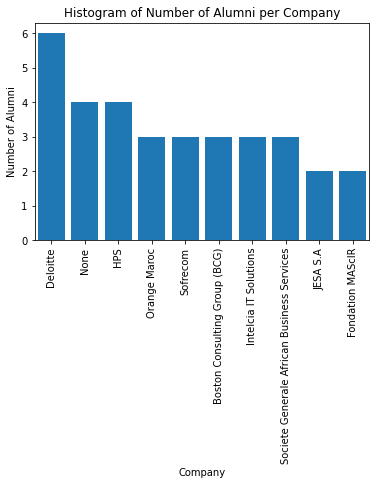

In [289]:
import matplotlib.pyplot as plt

top_10_companies = company_counts.index[:10]
# create a bar plot of the company_tuples
plt.bar([t[0] for t in company_tuples], [t[1] for t in company_tuples])

# add labels and a title to the plot
plt.xlabel('Company')
plt.ylabel('Number of Alumni')
plt.title('Histogram of Number of Alumni per Company')

plt.xticks(range(len(top_10_companies)), top_10_companies, rotation=90)
plt.xlim(-0.5,9.5)

plt.show()


In [238]:
# Find alumni based on their company of work

cmp=input("Enter a company : ")
filtered_df = df[df['company'] == cmp]
print(filtered_df)

Enter a company : HPS
                      name                         job  \
29       Hamza El Bairouni    IT Engineer | IT Auditor   
44  El Mehdi Alaoui-Kadiri              Chef de projet   
50          Abdelhak Tebai     Senior Project Manager    
95   Anoumou Fostin KPODAR  Embedded Software Engineer   

                                            location company  
29                      Casablanca Metropolitan Area     HPS  
44                         Casablanca-Settat Morocco     HPS  
50  Province de Benslimane Casablanca-Settat Morocco     HPS  
95                  Rabat Rabat-Sale-Kenitra Morocco     HPS  


In [287]:
top_10_companies = company_counts.index[:10]